References:

https://www.youtube.com/watch?v=m2AyljDHYes

https://www.kaggle.com/yugpuroosh/autoencoder-made-easy/edit

In [10]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import tensorflow as tf  
from sklearn import metrics

from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7738243935198932260
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6158221312
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7575380004174302103
physical_device_desc: "device: 0, name: GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
washer_ok_path = "input_data/da_opencv/pos/"

washer_ok = []
for filename in os.listdir(washer_ok_path):
    if filename.endswith(".jpg"):
        img = image.load_img(washer_ok_path+filename, target_size=(256, 256))
        washer_ok.append(image.img_to_array(img))
washer_ok = np.array(washer_ok)


In [12]:
from sklearn.model_selection import train_test_split
washer_ok_train, washer_ok_test = train_test_split(washer_ok, test_size=0.20, random_state=0)

In [13]:
print("washer_ok_train", washer_ok_train.shape)
print("washer_ok_test", washer_ok_test.shape)

washer_ok_train (120, 256, 256, 3)
washer_ok_test (30, 256, 256, 3)


# *Visualize the washers*

In [14]:
def show_washer_data(X, n=10, title=""):
    plt.figure(figsize=(15,5))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range (n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(X[i].reshape((height, width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

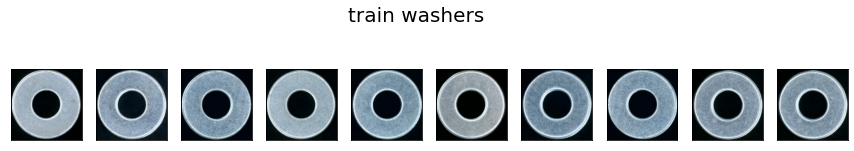

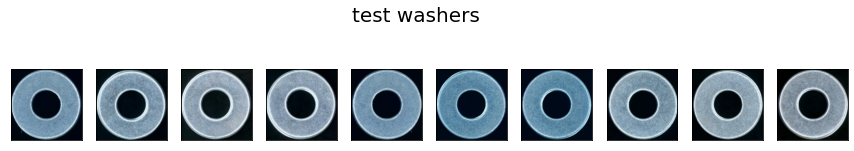

In [15]:
show_washer_data(washer_ok_train, title="train washers")
show_washer_data(washer_ok_test, title="test washers")

# *Build the washer Autoencoder*

In [16]:
input_layer = Input(shape=(256,256,3), name = "INPUT")
x = Conv2D(16, (3,3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name = "CODE")(x)

x = Conv2DTranspose(8, (3,3), activation = 'relu', padding='same')(code_layer)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(8, (3,3), activation = 'relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(8, (3,3), activation = 'relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(16, (3,3), activation = 'relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
outpput_layer = Conv2D(3, (3,3), padding='same', name='OUTPUT')(x)

model_AE = Model(input_layer, outpput_layer)

In [17]:
model_AE.compile(optimizer='adam', loss='mse')
model_AE.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 8)         0   

# *Train the washer Autoencoder*

In [18]:
#with tf.device('/CPU:0'):
with tf.device('/GPU:0'):
    history =model_AE.fit(washer_ok_train, washer_ok_train,
                        epochs=300,
                        batch_size = 32,
                        shuffle=True,   
                        validation_data=(washer_ok_test, washer_ok_test))

Epoch 1/300
4/4 [==============================] - 13s 493ms/step - loss: 17537.6109 - val_loss: 15515.0000
Epoch 2/300
4/4 [==============================] - 0s 70ms/step - loss: 16021.4527 - val_loss: 11118.3877
Epoch 3/300
4/4 [==============================] - 0s 69ms/step - loss: 9962.2955 - val_loss: 3909.8943
Epoch 4/300
4/4 [==============================] - 0s 69ms/step - loss: 4997.9548 - val_loss: 3803.5535
Epoch 5/300
4/4 [==============================] - 0s 70ms/step - loss: 3481.3724 - val_loss: 3324.0159
Epoch 6/300
4/4 [==============================] - 0s 71ms/step - loss: 3495.0660 - val_loss: 3165.5054
Epoch 7/300
4/4 [==============================] - 0s 70ms/step - loss: 3051.2126 - val_loss: 2890.8975
Epoch 8/300
4/4 [==============================] - 0s 70ms/step - loss: 2876.7274 - val_loss: 2573.1433
Epoch 9/300
4/4 [==============================] - 0s 71ms/step - loss: 2473.5926 - val_loss: 2326.8950
Epoch 10/300
4/4 [==============================] - 0s 69m

# *Save model*

In [19]:
model_AE.save('model_AE.h5')

# *Training Summary*

In [20]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,val_loss,epoch
295,215.847427,232.174530,295
296,213.536133,231.537613,296
297,213.073196,234.939407,297
298,211.006927,234.108978,298
299,210.240860,236.733200,299


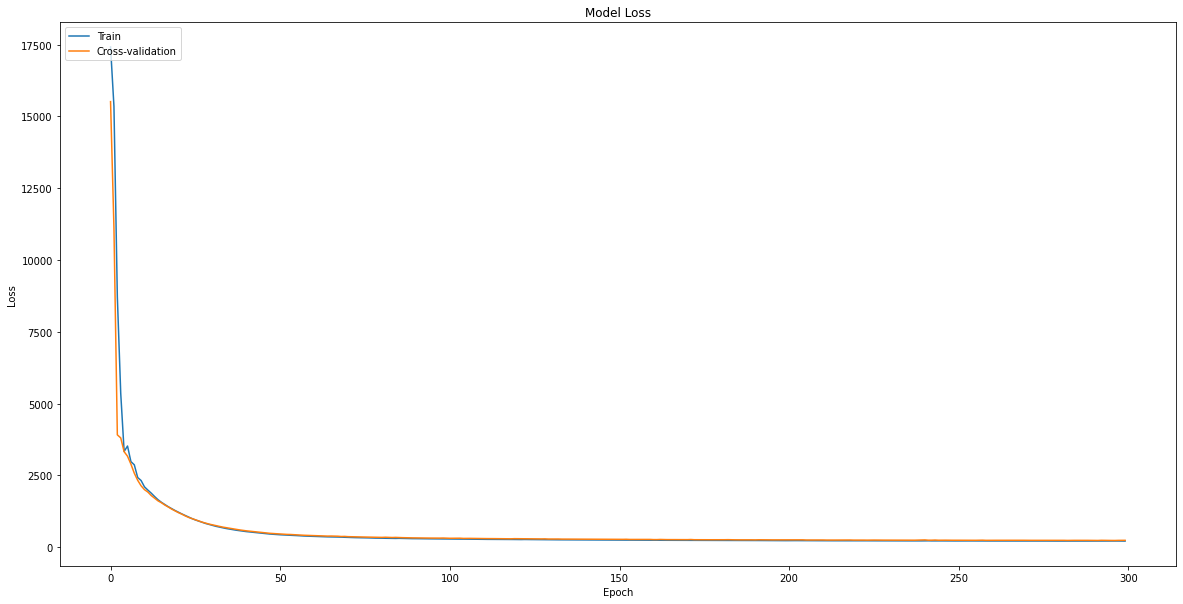

In [21]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-validation'], loc='upper left')
plt.show()

# *Load Saved model*

In [22]:
from tensorflow import keras
model_AE = keras.models.load_model('model_AE.h5')

# *Make a model to get the encoded representation (i.e. intermediate layer output) for a given washer image.*

In [23]:
get_encoded_data = Model(inputs=model_AE.input, outputs = model_AE.get_layer("CODE").output)

# *Get the encoded washers*

In [24]:
encoded_washer = get_encoded_data.predict(washer_ok_test)
encoded_washer.shape

(30, 16, 16, 8)

In [25]:
encoded_washer = encoded_washer.reshape((len(washer_ok_test), 16*16*8))
encoded_washer.shape

(30, 2048)

# *Get the reconstructed washers*

In [26]:
reconstructed_washers = model_AE.predict(washer_ok_test)

In [27]:
reconstructed_washers.shape

(30, 256, 256, 3)

# *Visialize the results on test set*

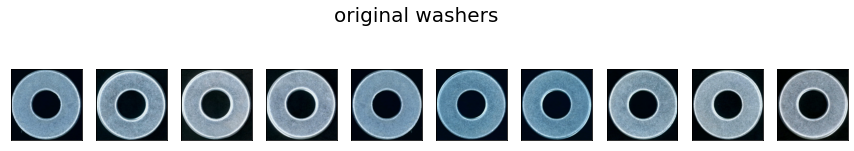

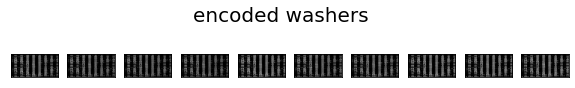

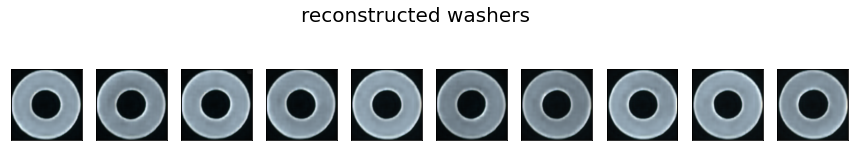

In [28]:
show_washer_data(washer_ok_test, title="original washers")
show_data(encoded_washer, height=32, width=64, title="encoded washers")
show_washer_data(reconstructed_washers, title="reconstructed washers")

# *Prediction on Test data Example*

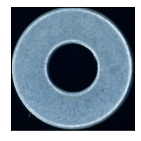

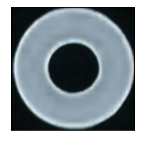

In [43]:
pred = model_AE.predict(washer_ok_test[4].reshape(-1, 256, 256, 3))
show_washer_data(washer_ok_test, n =1)
show_washer_data(pred, n=1)

In [44]:
from sklearn import metrics
score1 = np.sqrt(metrics.mean_squared_error(pred.flatten(), washer_ok_test[4].reshape(-1, 256, 256, 3).flatten()))
print(f"Score 1 Good Score (RMSE): {score1}")

Score 1 Good Score (RMSE): 15.134017944335938


# *Prediction on Anomalous Data*

In [46]:
neg_path = "input_data/da_opencv/neg/"

neg = []
for filename in os.listdir(neg_path):
    if filename.endswith(".jpg"):
        img = image.load_img(neg_path+filename, target_size=(256, 256))
        neg.append(image.img_to_array(img))
neg = np.array(neg)

In [47]:
neg.shape

(155, 256, 256, 3)

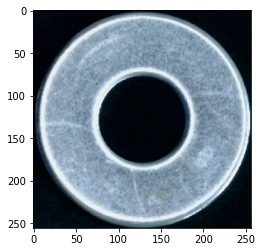

In [48]:
noisy_image = neg[0]
plt.imshow(image.array_to_img(noisy_image))

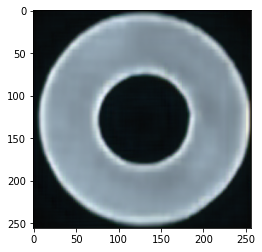

In [49]:
pred = model_AE.predict(noisy_image.reshape(-1, 256, 256, 3))
plt.imshow(image.array_to_img(neg[0]))
plt.imshow(image.array_to_img(pred[0]))

In [50]:
from sklearn import metrics
score3 = np.sqrt(metrics.mean_squared_error(pred.flatten(), neg[0].reshape(-1, 256, 256, 3).flatten()))
print(f"Score 2 With 30 Noise Score (RMSE): {score3}")

Score 2 With 30 Noise Score (RMSE): 15.498636245727539


# *Flask App to Set the Threshold*
下記のコードを実行して「　http://localhost:5000/test　」をブラウザで開けてください。

Required Python libraries
os, numpy, scikit-learn, tensorflow(v2+), keras, Flask

Create enviornment using following: 
* pip install numpy
* pip install Keras
* pip install scikit-learn
* pip install tensorflow
* pip install Flask

In [37]:
import os 
import numpy as np

from sklearn import metrics
from tensorflow import keras
from keras.preprocessing import image

from flask import Flask
from flask import render_template
from flask import request

from flask import Flask, redirect, url_for, request
app = Flask(__name__)

# PREDICT THE MEAN SQAURED ERROR BETWEEN INPUT IMAGE AND PREDICTION
def predImages(imgDir):
    res = {}
    for filename in os.listdir(imgDir):
        if filename.endswith(".jpg"):
            img = image.load_img(imgDir+filename, target_size=(256, 256))
            img  = image.img_to_array(img)
            pred = model_AE.predict(img.reshape(-1, 256, 256, 3))
            score = np.sqrt(metrics.mean_squared_error(pred.flatten(), img.reshape(-1, 256, 256, 3).flatten()))
            res[filename] = score
    return res

# Detect ANOMALIES by COMPARING RECONSTRUCION ERROR and THRESHOLD 
def checkAnomaly(pred,threshold=0):
    anomalies = 0
    for val in pred.values():
        if val > threshold:
            anomalies+=1
    return anomalies

# Print in Python Console
def print_res(threshold):
    print("Anamolies in training Data / False Negatives:\t{0} out of {1}"
      .format(checkAnomaly(train_pred, threshold), len(train_pred)))
    print("Anamolies in Sure / True Positives:\t{0} out of {1}"
      .format(checkAnomaly(sure_pred, threshold), len(sure_pred)))
    print("Anamolies in Sabi / True Positives:\t{0} out of {1}"
      .format(checkAnomaly(sabi_pred, threshold), len(sabi_pred)))
    print("Anamolies in Kizu / True Positives:\t{0} out of {1}"
      .format(checkAnomaly(kizu_pred, threshold), len(kizu_pred)))

@app.route("/test", methods=["POST", 'GET'])
def test():
    if request.method == 'POST':
        threshold = float(request.form["name_of_slider"])
        print("IF{0}",format(threshold))
        print_res(threshold)
        
        train_anomalies, size_train_pred = checkAnomaly(train_pred, threshold), len(train_pred)
        sure_anomalies, size_sure_pred = checkAnomaly(sure_pred, threshold), len(sure_pred)
        sabi_anomalies, size_sabi_pred = checkAnomaly(sabi_pred, threshold), len(sabi_pred)
        kizu_anomalies, size_kizu_pred = checkAnomaly(kizu_pred, threshold), len(kizu_pred)
        
        return render_template('slider.html', 
                               slider_min = slider_min, 
                               slider_max = slider_max, 
                               slider_val = threshold,
                               train_anomalies = train_anomalies,
                               size_train_pred = size_train_pred,
                               sure_anomalies = sure_anomalies,
                               size_sure_pred = size_sure_pred,
                               sabi_anomalies = sabi_anomalies,
                               size_sabi_pred = size_sabi_pred,
                               kizu_anomalies = kizu_anomalies,
                               size_kizu_pred = size_kizu_pred
                              )
    else:
        print("ELSE")
        threshold = (slider_min+slider_max+1)/2
        
        train_anomalies, size_train_pred = checkAnomaly(train_pred, threshold), len(train_pred)
        sure_anomalies, size_sure_pred = checkAnomaly(sure_pred, threshold), len(sure_pred)
        sabi_anomalies, size_sabi_pred = checkAnomaly(sabi_pred, threshold), len(sabi_pred)
        kizu_anomalies, size_kizu_pred = checkAnomaly(kizu_pred, threshold), len(kizu_pred)
        
        return render_template('slider.html', 
                               slider_min = slider_min, 
                               slider_max = slider_max, 
                               slider_val = threshold,
                               train_anomalies = train_anomalies,
                               size_train_pred = size_train_pred,
                               sure_anomalies = sure_anomalies,
                               size_sure_pred = size_sure_pred,
                               sabi_anomalies = sabi_anomalies,
                               size_sabi_pred = size_sabi_pred,
                               kizu_anomalies = kizu_anomalies,
                               size_kizu_pred = size_kizu_pred
                              )
if __name__ == '__main__':
    # LOAD TRAINED MODEL AND PREDICT THE VALUES
    model_AE = keras.models.load_model('model_AE.h5')
    train_pred = predImages(imgDir="input_data/da_opencv/pos/")
    sure_pred = predImages(imgDir="input_data/washer_ng/sure/")
    sabi_pred = predImages(imgDir="input_data/washer_ng/sabi/")
    kizu_pred = predImages(imgDir="input_data/washer_ng/kizu/")
    slider_max = max(max(train_pred.values()), max(sure_pred.values()), max(sabi_pred.values()), max(kizu_pred.values()))
    slider_min = min(min(train_pred.values()), min(sure_pred.values()), min(sabi_pred.values()), min(kizu_pred.values()))
    
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Jul/2021 22:59:34] "GET /test HTTP/1.1" 200 -


ELSE


127.0.0.1 - - [29/Jul/2021 22:59:39] "POST /test HTTP/1.1" 200 -


IF{0} 16.3209355
Anamolies in training Data / False Negatives:	14 out of 150
Anamolies in Sure / True Positives:	20 out of 31
Anamolies in Sabi / True Positives:	2 out of 4
Anamolies in Kizu / True Positives:	22 out of 47


127.0.0.1 - - [29/Jul/2021 22:59:40] "POST /test HTTP/1.1" 200 -


IF{0} 15.9309355
Anamolies in training Data / False Negatives:	15 out of 150
Anamolies in Sure / True Positives:	23 out of 31
Anamolies in Sabi / True Positives:	3 out of 4
Anamolies in Kizu / True Positives:	28 out of 47


127.0.0.1 - - [29/Jul/2021 22:59:42] "POST /test HTTP/1.1" 200 -


IF{0} 15.7009355
Anamolies in training Data / False Negatives:	27 out of 150
Anamolies in Sure / True Positives:	26 out of 31
Anamolies in Sabi / True Positives:	3 out of 4
Anamolies in Kizu / True Positives:	32 out of 47


127.0.0.1 - - [29/Jul/2021 22:59:48] "POST /test HTTP/1.1" 200 -


IF{0} 15.6909355
Anamolies in training Data / False Negatives:	27 out of 150
Anamolies in Sure / True Positives:	26 out of 31
Anamolies in Sabi / True Positives:	3 out of 4
Anamolies in Kizu / True Positives:	32 out of 47


127.0.0.1 - - [29/Jul/2021 22:59:52] "POST /test HTTP/1.1" 200 -


IF{0} 15.6309355
Anamolies in training Data / False Negatives:	29 out of 150
Anamolies in Sure / True Positives:	26 out of 31
Anamolies in Sabi / True Positives:	3 out of 4
Anamolies in Kizu / True Positives:	34 out of 47


127.0.0.1 - - [29/Jul/2021 23:00:10] "POST /test HTTP/1.1" 200 -


IF{0} 15.7209355
Anamolies in training Data / False Negatives:	27 out of 150
Anamolies in Sure / True Positives:	26 out of 31
Anamolies in Sabi / True Positives:	3 out of 4
Anamolies in Kizu / True Positives:	32 out of 47


127.0.0.1 - - [29/Jul/2021 23:00:14] "POST /test HTTP/1.1" 200 -


IF{0} 15.8409355
Anamolies in training Data / False Negatives:	20 out of 150
Anamolies in Sure / True Positives:	23 out of 31
Anamolies in Sabi / True Positives:	3 out of 4
Anamolies in Kizu / True Positives:	28 out of 47


127.0.0.1 - - [29/Jul/2021 23:00:19] "POST /test HTTP/1.1" 200 -


IF{0} 15.7609355
Anamolies in training Data / False Negatives:	23 out of 150
Anamolies in Sure / True Positives:	25 out of 31
Anamolies in Sabi / True Positives:	3 out of 4
Anamolies in Kizu / True Positives:	32 out of 47


127.0.0.1 - - [29/Jul/2021 23:00:22] "POST /test HTTP/1.1" 200 -


IF{0} 15.6909355
Anamolies in training Data / False Negatives:	27 out of 150
Anamolies in Sure / True Positives:	26 out of 31
Anamolies in Sabi / True Positives:	3 out of 4
Anamolies in Kizu / True Positives:	32 out of 47


127.0.0.1 - - [29/Jul/2021 23:00:23] "POST /test HTTP/1.1" 200 -


IF{0} 15.6109355
Anamolies in training Data / False Negatives:	29 out of 150
Anamolies in Sure / True Positives:	26 out of 31
Anamolies in Sabi / True Positives:	3 out of 4
Anamolies in Kizu / True Positives:	34 out of 47


127.0.0.1 - - [29/Jul/2021 23:00:26] "POST /test HTTP/1.1" 200 -


IF{0} 15.6109355
Anamolies in training Data / False Negatives:	29 out of 150
Anamolies in Sure / True Positives:	26 out of 31
Anamolies in Sabi / True Positives:	3 out of 4
Anamolies in Kizu / True Positives:	34 out of 47


127.0.0.1 - - [29/Jul/2021 23:00:29] "POST /test HTTP/1.1" 200 -


IF{0} 15.6109355
Anamolies in training Data / False Negatives:	29 out of 150
Anamolies in Sure / True Positives:	26 out of 31
Anamolies in Sabi / True Positives:	3 out of 4
Anamolies in Kizu / True Positives:	34 out of 47
